# Tools Comparison

In [8]:
import pandas as pd
import requests
import json
import math
from collections import defaultdict

## 1. antiSMASH 

### Streptomyces avidinii

So I uploaded the `Streptomyces avidinii DSM40526.gbk` file in [here](https://antismash.secondarymetabolites.org/#!/start) and the output was a `json` file. 

In [9]:
url = 'https://antismash.secondarymetabolites.org/upload/bacteria-2fb033ee-351e-468b-ba8e-b7997d2d173b/Streptomyces_avidinii_DSM40526.json'
response = requests.get(url)
if response.status_code == 200:
    with open('S.avidinii/Streptomyces.json', 'w') as f:
        f.write(response.text)

In [51]:
# Load the antiSMASH output JSON file
with open('/Users/Erfan/Documents/GitHub/BGC_Prediction/S.avidinii/antiSMASH/Streptomyces.json') as f:
    data = json.load(f)

# Access the records
record = data['records']

# Initialize a dictionary to store regions of interest with combined types
regions_by_location = defaultdict(lambda: {"types": set()})

for record in data['records']:
    sequence_id = record.get('id')

    # Iterate through records and features
    for feature in record['features']:
        location = feature.get('location')
        feature_type = feature.get('type')
        if feature_type != "region":
            continue


        # Parse the location to extract start and end coordinates
        if location and location.startswith('['):
            location = location[0:location.find(']')+1]
            start, end = map(int, location[1:-1].split(':'))            
            product_list = feature.get('qualifiers', {}).get('product', [''])
            product = ';'.join(product_list)

            # Add type to the region and ensure uniqueness
            region_key = (start, end)
            regions_by_location[region_key]["types"].add(feature_type)
            regions_by_location[region_key]["product"] = product
            regions_by_location[region_key]["sequence_id"] = sequence_id

# Convert the dictionary into a list of regions with combined types
regions_of_interest_antiSMASH_avidinii = []
for (start, end), info in regions_by_location.items():
    regions_of_interest_antiSMASH_avidinii.append({
        'start': start,
        'end': end,
        'bgc_type': info["product"],
        'sequence_id': info["sequence_id"]
    })

# Remove the source region from the list
# regions_of_interest_antiSMASH_avidinii.remove({'start': 0, 'end': 8294299, 'bgc_type': 'source', 'sequence_id': '1'})

# Display the extracted regions
for region in regions_of_interest_antiSMASH_avidinii:
    print(f"Region from {region['start']} to {region['end']} of types {region['bgc_type']} with sequence id {region['sequence_id']}")

Region from 20958 to 69440 of types butyrolactone;NRPS-like;NRPS with sequence id 1
Region from 160917 to 194829 of types NAPAA with sequence id 1
Region from 195082 to 215823 of types CDPS with sequence id 1
Region from 259756 to 300818 of types T3PKS with sequence id 1
Region from 323347 to 365538 of types NI-siderophore;lanthipeptide-class-i with sequence id 1
Region from 576721 to 602091 of types terpene with sequence id 1
Region from 712090 to 739427 of types melanin with sequence id 1
Region from 743745 to 764651 of types terpene with sequence id 1
Region from 824190 to 845564 of types terpene with sequence id 1
Region from 890033 to 912748 of types lanthipeptide-class-iii with sequence id 1
Region from 997934 to 1019032 of types terpene with sequence id 1
Region from 1267270 to 1354249 of types NRPS with sequence id 1
Region from 1386792 to 1436966 of types hglE-KS;T1PKS with sequence id 1
Region from 1509436 to 1536473 of types terpene with sequence id 1
Region from 1778420 to 

### Streptomyces ameniacus

We do exactly the same process for the other 2 genomes:

In [11]:
url = 'https://antismash.secondarymetabolites.org/upload/bacteria-73e74e0f-3cba-4907-99fb-43e737bc6ddc/Streptomyces_ameniacus.json'
response = requests.get(url)
if response.status_code == 200:
    with open('S.ameniacus/Streptomyces_ameniacus.json', 'w') as f:
        f.write(response.text)

In [12]:
# Load the antiSMASH output JSON file
with open('/Users/Erfan/Documents/GitHub/BGC_Prediction/S.ameniacus/antiSMASH/Streptomyces_ameniacus.json') as f:
    data = json.load(f)

# Access the records
# record = data['records'][1]

# Initialize a dictionary to store regions of interest with combined types
regions_by_location = defaultdict(lambda: {"types": set()})

for record in data['records']:
    sequence_id = record.get('id')

    # Iterate through records and features
    for feature in record['features']:
        location = feature.get('location')
        feature_type = feature.get('type')
        if feature_type != "region":
                continue

        # Parse the location to extract start and end coordinates
        if location and location.startswith('['):
            location = location[0:location.find(']')+1]
            start, end = map(int, location[1:-1].split(':'))
            product_list = feature.get('qualifiers', {}).get('product', [''])
            product = ';'.join(product_list)

            # Add type to the region and ensure uniqueness
            region_key = (start, end)
            regions_by_location[region_key]["types"].add(feature_type)
            regions_by_location[region_key]["product"] = product
            regions_by_location[region_key]["sequence_id"] = sequence_id

# Convert the dictionary into a list of regions with combined types
regions_of_interest_antiSMASH_ameniacus = []
for (start, end), info in regions_by_location.items():
    regions_of_interest_antiSMASH_ameniacus.append({
        'start': start,
        'end': end,
        'bgc_type': info["product"],
        'sequence_id': info["sequence_id"]
    })

# Remove the source region from the list
# regions_of_interest_antiSMASH_ameniacus.remove({'start': 0, 'end': 86596, 'sequence_id': 'CP042324.1', 'bgc_type': ''})

# Display the extracted regions
for region in regions_of_interest_antiSMASH_ameniacus:
    print(f"Region from {region['start']} to {region['end']}     of types {region['bgc_type']}      with sequence id {region['sequence_id']}")


Region from 8062 to 21281     of types hydrogen-cyanide      with sequence id 2
Region from 277931 to 325788     of types T1PKS;NRPS-like      with sequence id 2
Region from 674597 to 747022     of types NRPS;NRPS-like;NI-siderophore      with sequence id 2
Region from 773710 to 800244     of types terpene      with sequence id 2
Region from 837629 to 910226     of types T2PKS      with sequence id 2
Region from 924060 to 976235     of types NRPS-like;lanthipeptide-class-iv      with sequence id 2
Region from 1056334 to 1171415     of types T1PKS;T3PKS;linaridin      with sequence id 2
Region from 1239515 to 1260445     of types nucleoside      with sequence id 2
Region from 1801576 to 1822743     of types terpene      with sequence id 2
Region from 1888619 to 1932144     of types NI-siderophore;terpene      with sequence id 2
Region from 2168406 to 2190898     of types lassopeptide      with sequence id 2
Region from 2273460 to 2296268     of types lanthipeptide-class-iv      with seq

### S. coelicolor 

In [13]:
url = 'https://antismash.secondarymetabolites.org/upload/bacteria-e3506f54-b452-4769-b108-1455e5e78502/S._coelicolor_A32.json'
response = requests.get(url)
if response.status_code == 200:
    with open('S.coelicolor/coelicolor.json', 'w') as f:
        f.write(response.text)

In [14]:
# Load the antiSMASH output JSON file
with open('/Users/Erfan/Documents/GitHub/BGC_Prediction/S.coelicolor/antiSMASH/coelicolor.json') as f:
    data = json.load(f)

# Access the records
record = data['records']

# Initialize a dictionary to store regions of interest with combined types
regions_by_location = defaultdict(lambda: {"types": set()})

for record in data['records']:
    sequence_id = record.get('id')

    # Iterate through records and features
    for feature in record['features']:
        location = feature.get('location')
        feature_type = feature.get('type')
        if feature_type != "region":
            continue

        # Parse the location to extract start and end coordinates
        if location and location.startswith('[') and location.endswith(']'):
            start, end = map(int, location[1:-1].split(':'))
            product_list = feature.get('qualifiers', {}).get('product', [''])
            product = ';'.join(product_list)

            # Add type to the region and ensure uniqueness
            region_key = (start, end)
            regions_by_location[region_key]["types"].add(feature_type)
            regions_by_location[region_key]["product"] = product
            regions_by_location[region_key]["sequence_id"] = sequence_id

# Convert the dictionary into a list of regions with combined types
regions_of_interest_antiSMASH_coelicolor = []
for (start, end), info in regions_by_location.items():
    regions_of_interest_antiSMASH_coelicolor.append({
        'start': start,
        'end': end,
        'bgc_type': info["product"],
        'sequence_id': info["sequence_id"]
    })

# Display the extracted regions
for region in regions_of_interest_antiSMASH_coelicolor:
    print(f"Region from {region['start']} to {region['end']} of types {region['bgc_type']} with sequence id {region['sequence_id']}")


Region from 86636 to 139654 of types hglE-KS with sequence id CP042324.1
Region from 166500 to 192038 of types terpene with sequence id CP042324.1
Region from 246525 to 271084 of types lanthipeptide-class-i with sequence id CP042324.1
Region from 493988 to 552325 of types NRP-metallophore;NRPS with sequence id CP042324.1
Region from 791583 to 801799 of types RiPP-like with sequence id CP042324.1
Region from 1257625 to 1298750 of types T3PKS with sequence id CP042324.1
Region from 1995502 to 2005901 of types ectoine with sequence id CP042324.1
Region from 2939312 to 2949882 of types melanin with sequence id CP042324.1
Region from 3024901 to 3054689 of types NI-siderophore with sequence id CP042324.1
Region from 3523383 to 3604037 of types NRPS with sequence id CP042324.1
Region from 5494911 to 5567535 of types T2PKS with sequence id CP042324.1
Region from 5671126 to 5692212 of types terpene with sequence id CP042324.1
Region from 5752055 to 5824598 of types T2PKS with sequence id CP0423

In [15]:
len(regions_of_interest_antiSMASH_coelicolor)

27

## 2. GECCO

### Streptomyces avidinii

To use GECCO with a GenBank (.gbk) file, I need to convert the .gbk file to a FASTA format file (.fna), as GECCO primarily requires FASTA format for its genomic analysis. Here’s a way to handle this:

<div class="alert alert-block alert-info">
<b>Convert .gbk to .fna:</b> 

We can use the Bio module from the Biopython library to convert the GenBank file to a FASTA file.

`$pip install biopython`

</div>

In [16]:
## 1 Time running Cell

# input_gbk = "/Users/Erfan/Downloads/The_genomes/Streptomyces avidinii DSM40526.gbk"  # The GenBank file
# output_fasta = "/Users/Erfan/Downloads/The_genomes/Fasta/Streptomyces_avidinii_DSM40526.fna"  # Output FASTA file

# with open(output_fasta, "w") as fasta_file:
#     for record in SeqIO.parse(input_gbk, "genbank"):
#         SeqIO.write(record, fasta_file, "fasta")

Once we have the FASTA file `sequence.fna`, we can run GECCO as usual:

In [17]:
## 1 Time running Cell

# !gecco run --genome /Users/Erfan/Downloads/The_genomes/Fasta/Streptomyces_avidinii_DSM40526.fna 

In [18]:
# Load the GECCO output tsv file
avidinii_gecco = pd.read_csv('S.avidinii/GECCO/Streptomyces_avidinii_DSM40526.clusters.tsv', delimiter='\t')

avidinii_gecco.head(5)

,sequence_id,cluster_id,start,end,average_p,max_p,type,alkaloid_probability,nrp_probability,polyketide_probability,ripp_probability,saccharide_probability,terpene_probability,proteins,domains
0,1,1_cluster_1,3,52580,0.979308,0.999998,NRP,0.020000,0.580000,0.450000,0.010000,0.130000,0.030000,1_1;1_10;1_11;1_12;1_13;1_14;1_15;1_16;1_17;1_...,PF00067;PF00106;PF00106;PF00165;PF00248;PF0044...
1,1,1_cluster_2,138270,179829,0.961178,0.990478,Unknown,0.024994,0.242924,0.392387,0.058800,0.090000,0.041155,1_137;1_138;1_139;1_140;1_141;1_142;1_143;1_14...,PF00067;PF00106;PF00282;PF00440;PF00441;PF0044...
2,1,1_cluster_3,197745,213936,0.961436,0.998385,Unknown,0.016903,0.169793,0.168784,0.118112,0.026667,0.075521,1_185;1_186;1_187;1_188;1_189;1_190;1_191;1_19...,PF00067;PF00196;PF00196;PF00561;PF01636;PF0256...
3,1,1_cluster_4,278784,285231,0.891563,0.969734,Polyketide,0.046991,0.064598,0.644977,0.020664,0.000000,0.108060,1_269;1_270;1_271;1_272;1_273;1_274;1_275,PF00135;PF00195;PF01040;PF01494;PF02797;PF0414...
4,1,1_cluster_5,292568,312881,0.934127,0.998578,Unknown,0.008821,0.114287,0.275016,0.074409,0.020000,0.096050,1_281;1_282;1_283;1_284;1_285;1_286;1_287;1_28...,PF00083;PF00440;PF00583;PF03171;PF03403;PF0769...


In [19]:
# List to store regions of interest
regions_of_interest_GECCO_avidinii = []

for index, row in avidinii_gecco.iterrows():
    region = {
        'start': row['start'],
        'end': row['end'],
        'sequence_id': row['sequence_id'],
        'bgc_type': row['type']
    }
    regions_of_interest_GECCO_avidinii.append(region)

# Display the extracted regions
for region in regions_of_interest_GECCO_avidinii:
    print(f"Region from {region['start']} to {region['end']}")


Region from 3 to 52580
Region from 138270 to 179829
Region from 197745 to 213936
Region from 278784 to 285231
Region from 292568 to 312881
Region from 332793 to 360582
Region from 514540 to 530391
Region from 574503 to 602147
Region from 607494 to 628888
Region from 698855 to 712676
Region from 714482 to 741378
Region from 800007 to 840610
Region from 895948 to 910204
Region from 958961 to 965038
Region from 1007021 to 1014841
Region from 1069302 to 1090953
Region from 1274109 to 1336113
Region from 1394693 to 1400846
Region from 1405372 to 1422643
Region from 1516311 to 1532076
Region from 1712855 to 1718429
Region from 1782436 to 1815893
Region from 1868707 to 1886387
Region from 2115056 to 2122067
Region from 2145481 to 2321683
Region from 2334868 to 2359202
Region from 2446287 to 2455906
Region from 2902989 to 3014325
Region from 4050756 to 4058495
Region from 4283210 to 4307076
Region from 4919645 to 4926735
Region from 5336404 to 5349642
Region from 5855717 to 5865868
Region from

### Streptomyces ameniacus

We do exactly the same process for the other 2 genomes:

In [20]:
## 1 Time running Cell

# input_gbk = "/Users/Erfan/Downloads/The_genomes/Streptomyces ameniacus.gbk"  # The GenBank file
# output_fasta = "/Users/Erfan/Downloads/The_genomes/Fasta/Streptomyces_ameniacus.fna"  # Output FASTA file

# with open(output_fasta, "w") as fasta_file:
#     for record in SeqIO.parse(input_gbk, "genbank"):
#         SeqIO.write(record, fasta_file, "fasta")

In [21]:
## 1 Time running Cell

# !gecco run --genome /Users/Erfan/Downloads/The_genomes/Fasta/Streptomyces_ameniacus.fna 

In [22]:
# Load the GECCO output tsv file
Streptomyces_ameniacus_gecco = pd.read_csv('S.ameniacus/GECCO/Streptomyces_ameniacus.clusters.tsv', delimiter='\t')

Streptomyces_ameniacus_gecco.head(5)

,sequence_id,cluster_id,start,end,average_p,max_p,type,alkaloid_probability,nrp_probability,polyketide_probability,ripp_probability,saccharide_probability,terpene_probability,proteins,domains
0,2,2_cluster_1,237455,254327,0.932796,0.998583,Unknown,0.024545,0.058964,0.427130,0.045024,0.01,0.078175,2_205;2_206;2_207;2_208;2_209;2_210;2_211;2_21...,PF00005;PF00072;PF00196;PF00291;PF00440;PF0045...
1,2,2_cluster_2,292255,317892,0.944167,0.999756,Polyketide,0.020000,0.450000,0.750000,0.000000,0.04,0.050000,2_261;2_262;2_263;2_264;2_265;2_266;2_267;2_26...,PF00005;PF00106;PF00108;PF00109;PF00122;PF0012...
2,2,2_cluster_4,691615,716203,0.983350,1.000000,NRP;Polyketide,0.000000,0.910000,0.560000,0.000000,0.01,0.000000,2_609;2_610;2_611;2_612;2_613;2_614;2_615;2_61...,PF00109;PF00441;PF00501;PF00501;PF00501;PF0055...
3,2,2_cluster_5,725874,738232,0.967412,0.999946,Unknown,0.055332,0.095724,0.115341,0.070724,0.04,0.042759,2_634;2_635;2_636;2_637;2_638;2_639;2_640;2_64...,PF00756;PF01022;PF01168;PF01408;PF02746;PF0278...
4,2,2_cluster_6,770507,796232,0.966714,0.999997,Terpene,0.022269,0.087704,0.085799,0.045817,0.12,0.543040,2_673;2_674;2_675;2_676;2_677;2_678;2_679;2_68...,PF00005;PF00202;PF00348;PF00432;PF00440;PF0044...


In [23]:
# List to store regions of interest
regions_of_interest_GECCO_ameniacus = []

for index, row in Streptomyces_ameniacus_gecco.iterrows():
    region = {
        'start': row['start'],
        'end': row['end'],
        'sequence_id': row['sequence_id'],
        'bgc_type': row['type']
    }
    regions_of_interest_GECCO_ameniacus.append(region)

# Display the extracted regions
for region in regions_of_interest_GECCO_ameniacus:
    print(f"Region from {region['start']} to {region['end']}")

Region from 237455 to 254327
Region from 292255 to 317892
Region from 691615 to 716203
Region from 725874 to 738232
Region from 770507 to 796232
Region from 860514 to 882174
Region from 936493 to 968267
Region from 1058317 to 1162473
Region from 1224753 to 1255998
Region from 1402574 to 1427911
Region from 1687885 to 1715413
Region from 1807075 to 1824416
Region from 1902620 to 1908927
Region from 2172781 to 2183699
Region from 2316912 to 2327687
Region from 2791345 to 2810526
Region from 2827141 to 2979790
Region from 3046946 to 3052967
Region from 3201250 to 3212021
Region from 3653339 to 3708629
Region from 4449513 to 4467660
Region from 4872047 to 4891311
Region from 5394847 to 5464084
Region from 5584768 to 5596902
Region from 5620661 to 5671001
Region from 5690098 to 5703376
Region from 5851387 to 5868313
Region from 6951400 to 6965141
Region from 7038877 to 7048871
Region from 7357643 to 7401853
Region from 7445418 to 7497093
Region from 7549999 to 7567366
Region from 7823595 to

### S. coelicolor 

In [24]:
## 1 Time running Cell

# input_gbk = "/Users/Erfan/Downloads/The_genomes/S. coelicolor A3(2).gbk"  # The GenBank file
# output_fasta = "/Users/Erfan/Downloads/The_genomes/Fasta/S.coelicolor_A3.fna"  # Output FASTA file

# with open(output_fasta, "w") as fasta_file:
#     for record in SeqIO.parse(input_gbk, "genbank"):
#         SeqIO.write(record, fasta_file, "fasta")

In [25]:
## 1 Time running Cell

# !gecco run --genome /Users/Erfan/Downloads/The_genomes/Fasta/S.coelicolor_A3.fna

In [26]:
# Load the GECCO output tsv file
coelicolor_gecco = pd.read_csv('S.coelicolor/GECCO/S.coelicolor_A3.clusters.tsv', delimiter='\t')

coelicolor_gecco.head(5)

,sequence_id,cluster_id,start,end,average_p,max_p,type,alkaloid_probability,nrp_probability,polyketide_probability,ripp_probability,saccharide_probability,terpene_probability,proteins,domains
0,CP042324.1,CP042324.1_cluster_1,1144,42174,0.955674,0.999175,Unknown,0.056906,0.193690,0.212401,0.216538,0.06,0.092709,CP042324.1_10;CP042324.1_11;CP042324.1_12;CP04...,PF00201;PF00665;PF00881;PF01047;PF01590;PF0169...
1,CP042324.1,CP042324.1_cluster_2,98463,128290,0.963851,0.999986,Polyketide,0.010000,0.190000,0.850000,0.020000,0.00,0.030000,CP042324.1_100;CP042324.1_101;CP042324.1_102;C...,PF00005;PF00106;PF00109;PF00109;PF00109;PF0019...
2,CP042324.1,CP042324.1_cluster_3,168705,189886,0.945490,0.999977,Terpene,0.030000,0.100000,0.190000,0.010000,0.03,0.590000,CP042324.1_148;CP042324.1_149;CP042324.1_150;C...,PF00107;PF00348;PF00355;PF00494;PF00582;PF0058...
3,CP042324.1,CP042324.1_cluster_4,250805,267513,0.936970,0.998160,RiPP,0.002010,0.142577,0.093226,0.641250,0.00,0.026305,CP042324.1_226;CP042324.1_227;CP042324.1_228;C...,PF00126;PF00528;PF00528;PF00561;PF00975;PF0104...
4,CP042324.1,CP042324.1_cluster_5,494260,544087,0.970834,0.999982,NRP,0.020000,0.690000,0.160000,0.100000,0.05,0.030000,CP042324.1_435;CP042324.1_436;CP042324.1_437;C...,PF00005;PF00005;PF00005;PF00005;PF00148;PF0027...


In [27]:
# List to store regions of interest
regions_of_interest_GECCO_coelicolor = []

for index, row in coelicolor_gecco.iterrows():
    region = {
        'start': row['start'],
        'end': row['end'],
        'sequence_id': row['sequence_id'],
        'bgc_type': row['type']
    }
    regions_of_interest_GECCO_coelicolor.append(region)

# Display the extracted regions
for region in regions_of_interest_GECCO_coelicolor:
    print(f"Region from {region['start']} to {region['end']}")


Region from 1144 to 42174
Region from 98463 to 128290
Region from 168705 to 189886
Region from 250805 to 267513
Region from 494260 to 544087
Region from 738595 to 745763
Region from 1126536 to 1134013
Region from 1151871 to 1170557
Region from 1275236 to 1282541
Region from 1333825 to 1368914
Region from 1998471 to 2009395
Region from 2609903 to 2639565
Region from 2934121 to 2953611
Region from 3027521 to 3043377
Region from 3122987 to 3144092
Region from 3513073 to 3604156
Region from 3880132 to 3885868
Region from 4001700 to 4028808
Region from 4242547 to 4258463
Region from 4615186 to 4635188
Region from 4895305 to 4899224
Region from 5511382 to 5536398
Region from 5681127 to 5684576
Region from 5776741 to 5797590
Region from 6339613 to 6343370
Region from 6428976 to 6470988
Region from 6541621 to 6551520
Region from 6553666 to 6563892
Region from 6831460 to 6878289
Region from 6889708 to 6949872
Region from 6991869 to 7012285
Region from 7106398 to 7132198
Region from 7170258 to 7

## 3. DeepBGC : Biosynthetic Gene Cluster detection and classification

DeepBGC detects BGCs in bacterial and fungal genomes using deep learning. DeepBGC employs a Bidirectional Long Short-Term Memory Recurrent Neural Network and a word2vec-like vector embedding of Pfam protein domains. Product class and activity of detected BGCs is predicted using a Random Forest classifier.

<div class="alert alert-block alert-info">
<b>Install DeepBGC</b> 

Set up Bioconda and Conda-Forge channels:

`conda config --add channels bioconda`

`conda config --add channels conda-forge`


Create a separate DeepBGC environment and install dependencies

`conda create -n deepbgc python=3.7 hmmer prodigal`

Install DeepBGC into the environment using pip

`conda activate deepbgc`

`pip install deepbgc`

Alternatively, install everything using conda (currently unstable due to conda conflicts)

`conda install deepbgc`
</div>

<div class="alert alert-block alert-info">
<b>Convert .gbk to .fna:</b> 

We can use the Bio module from the Biopython library to convert the GenBank file to a FASTA file.

`$pip install biopython`

</div>

### S. coelicolor

In [52]:
# Load the DeepBGC output file
deepbgc_output_coelicolor_A3 = pd.read_csv("/Users/Erfan/Documents/GitHub/BGC_Prediction/S.coelicolor/DeepBGC/S.coelicolor_A3.bgc.tsv", sep="\t")

# Rename columns to match the other tools
deepbgc_output_coelicolor_A3 = deepbgc_output_coelicolor_A3.rename(columns={"nucl_start": "start", "nucl_end": "end", "product_class": "bgc_type"})

# Preview the data
deepbgc_output_coelicolor_A3.head()

,sequence_id,detector,detector_version,detector_label,bgc_candidate_id,start,end,nucl_length,num_proteins,num_domains,...,Alkaloid,NRP,Other,Polyketide,RiPP,Saccharide,Terpene,protein_ids,bio_pfam_ids,pfam_ids
0,CP042324.1,deepbgc,0.1.0,deepbgc,CP042324.1_1143-9307.1,1143,9307,8164,4,8,...,0.00,0.09,0.07,0.33,0.21,0.03,0.32,CP042324.1_CP042324.1_2;CP042324.1_CP042324.1_...,NaN,PF00270;PF04851;PF03457;PF06527;PF03457;PF1356...
1,CP042324.1,deepbgc,0.1.0,deepbgc,CP042324.1_10406-33357.1,10406,33357,22951,24,27,...,0.01,0.04,0.19,0.08,0.40,0.21,0.07,CP042324.1_CP042324.1_7;CP042324.1_CP042324.1_...,PF04101,PF06527;PF06965;PF00999;PF01590;PF13492;PF0386...
2,CP042324.1,deepbgc,0.1.0,deepbgc,CP042324.1_37613-39812.1,37613,39812,2199,3,6,...,0.00,0.18,0.27,0.31,0.15,0.01,0.10,CP042324.1_CP042324.1_36;CP042324.1_CP042324.1...,NaN,PF13463;PF12802;PF01047;PF01978;PF12697;PF03861
3,CP042324.1,deepbgc,0.1.0,deepbgc,CP042324.1_45266-121371.1,45266,121371,76105,55,118,...,0.05,0.14,0.15,0.67,0.08,0.02,0.05,CP042324.1_CP042324.1_46;CP042324.1_CP042324.1...,PF02801;PF00109;PF00698;PF01243;PF00107;PF0865...,PF08240;PF00208;PF00107;PF13602;PF13602;PF0682...
4,CP042324.1,deepbgc,0.1.0,deepbgc,CP042324.1_122742-128290.1,122742,128290,5548,4,8,...,0.00,0.38,0.29,0.15,0.12,0.01,0.06,CP042324.1_CP042324.1_102;CP042324.1_CP042324....,PF00561,PF13191;PF13401;PF00196;PF13384;PF12146;PF0056...


### Streptomyces_ameniacus

In [54]:
# Load the DeepBGC output file
deepbgc_output_ameniacus = pd.read_csv("/Users/Erfan/Documents/GitHub/BGC_Prediction/S.ameniacus/DeepBGC/Streptomyces_ameniacus.bgc.tsv", sep="\t")

# Rename columns to match the other tools
deepbgc_output_ameniacus = deepbgc_output_ameniacus.rename(columns={"nucl_start": "start", "nucl_end": "end", "product_class": "bgc_type"})

# Preview the data
deepbgc_output_ameniacus.head()

,sequence_id,detector,detector_version,detector_label,bgc_candidate_id,start,end,nucl_length,num_proteins,num_domains,...,Alkaloid,NRP,Other,Polyketide,RiPP,Saccharide,Terpene,protein_ids,bio_pfam_ids,pfam_ids
0,2,deepbgc,0.1.0,deepbgc,2_207840-217384.1,207840,217384,9544,8,24,...,0.08,0.07,0.17,0.13,0.03,0.32,0.52,2_2_182;2_2_183;2_2_184;2_2_185;2_2_186;2_2_18...,PF00501;PF01593;PF01636;PF01266;PF01494,PF01636;PF01633;PF12799;PF13855;PF04149;PF0050...
1,2,deepbgc,0.1.0,deepbgc,2_218090-219786.1,218090,219786,1696,2,2,...,0.00,0.07,0.08,0.32,0.18,0.11,0.31,2_2_191;2_2_192,PF04932,PF00293;PF04932
2,2,deepbgc,0.1.0,deepbgc,2_221467-222652.1,221467,222652,1185,1,5,...,0.00,0.05,0.01,0.08,0.05,0.75,0.06,2_2_195,PF00535,PF13641;PF00535;PF13704;PF13506;PF13632
3,2,deepbgc,0.1.0,deepbgc,2_225006-226925.1,225006,226925,1919,2,2,...,0.00,0.11,0.08,0.32,0.20,0.03,0.31,2_2_198;2_2_199,PF00171,PF05610;PF00171
4,2,deepbgc,0.1.0,deepbgc,2_297931-307503.1,297931,307503,9572,3,21,...,0.00,0.35,0.05,0.79,0.02,0.00,0.12,2_2_267;2_2_268;2_2_269,PF00501;PF00109;PF00108;PF01266;PF02801;PF0865...,PF00501;PF13193;PF00109;PF00108;PF02801;PF1619...


### Streptomyces_avidinii_DSM40526

In [55]:
# Load the DeepBGC output file
deepbgc_output_avidinii = pd.read_csv("/Users/Erfan/Documents/GitHub/BGC_Prediction/S.avidinii/DeepBGC/Streptomyces_avidinii_DSM40526.bgc.tsv", sep="\t")

# Rename columns to match the other tools
deepbgc_output_avidinii = deepbgc_output_avidinii.rename(columns={"nucl_start": "start", "nucl_end": "end", "product_class": "bgc_type"})

# Preview the data
deepbgc_output_avidinii.head()

,sequence_id,detector,detector_version,detector_label,bgc_candidate_id,start,end,nucl_length,num_proteins,num_domains,...,Alkaloid,NRP,Other,Polyketide,RiPP,Saccharide,Terpene,protein_ids,bio_pfam_ids,pfam_ids
0,1,deepbgc,0.1.0,deepbgc,1_2-74062.1,2,74062,74060,67,127,...,0.05,0.49,0.05,0.47,0.00,0.09,0.03,1_1_1;1_1_2;1_1_3;1_1_4;1_1_5;1_1_6;1_1_7;1_1_...,PF00106;PF02719;PF00668;PF00561;PF01494;PF0432...,PF01593;PF13450;PF13738;PF00743;PF13434;PF0156...
1,1,deepbgc,0.1.0,deepbgc,1_79179-81163.1,79179,81163,1984,2,4,...,0.00,0.02,0.53,0.08,0.16,0.10,0.14,1_1_73;1_1_74,PF03033;PF04101,PF00486;PF00072;PF03033;PF04101
2,1,deepbgc,0.1.0,deepbgc,1_93055-93805.1,93055,93805,750,1,1,...,0.00,0.10,0.07,0.33,0.21,0.03,0.31,1_1_88,NaN,PF11716
3,1,deepbgc,0.1.0,deepbgc,1_128035-139610.1,128035,139610,11575,10,25,...,0.07,0.04,0.37,0.11,0.18,0.05,0.23,1_1_124;1_1_125;1_1_126;1_1_127;1_1_128;1_1_12...,PF00171;PF01593;PF00248;PF00583;PF08241;PF0824...,PF01209;PF08003;PF03848;PF13847;PF13489;PF0235...
4,1,deepbgc,0.1.0,deepbgc,1_146760-150268.1,146760,150268,3508,4,3,...,0.00,0.05,0.51,0.17,0.12,0.02,0.16,1_1_141;1_1_142;1_1_143;1_1_144,PF00903,PF00440;PF13977;PF00903


## Create Table

### Create Table coelicolor

In [31]:
# Function to check if two regions intersect
def regions_intersect(region1, region2):
    sequence_id1, start1, end1 = region1
    sequence_id2, start2, end2 = region2
    return (str(sequence_id1) == str(sequence_id2)) and (max(start1, start2) <= min(end1, end2))

def add_reg_type(reg_type, existing_reg_type):
    if reg_type is None or (isinstance(reg_type, float) and math.isnan(reg_type)):
        reg_type = "Unknown"
    if existing_reg_type is None or (isinstance(existing_reg_type, float) and math.isnan(existing_reg_type)):
        existing_reg_type = "Unknown"

    total_reg = reg_type + "," + existing_reg_type 
    total_reg = total_reg.replace(";", ",")

    bgc_types_list = total_reg.split(',')

    # Use a dictionary to track unique items while preserving the original case
    unique_bgc_types_dict = {}
    for item in bgc_types_list:
        lower_item = item.lower()
        if lower_item not in unique_bgc_types_dict:
            unique_bgc_types_dict[lower_item] = item

    # Extract the unique items preserving the original case
    unique_bgc_types_list = list(unique_bgc_types_dict.values())

    if len(unique_bgc_types_list) > 1 and "Unknown" in unique_bgc_types_list:
        unique_bgc_types_list.remove("Unknown")

    bgc_types_string = ','.join(unique_bgc_types_list)

    return bgc_types_string

# Function to merge overlapping regions and track tools
def merge_regions_with_tools(regions, tool_name, results):
    for region in regions:
        sequence_id, reg_type, start, end = region  # Unpack the tuple
        found = False
        for i, existing in enumerate(results):
            existing_region = (existing["Sequence ID"], existing["Start"], existing["End"])
            if regions_intersect(existing_region, (sequence_id, start, end)):
                results[i]["Start"] = min(existing["Start"], start)
                results[i]["End"] = max(existing["End"], end)
                results[i][tool_name] = 1
                results[i]["Sequence ID"] = sequence_id
                results[i]["BGC Type"] = add_reg_type(reg_type, existing["BGC Type"])

                found = True
                break
        if not found:
            if isinstance(reg_type, float) and math.isnan(reg_type):
                reg_type = "Unknown"
            results.append({
                "Sequence ID": sequence_id,  # Replace with actual sequence ID if available
                "Start": start,
                "End": end,
                "BGC Type": reg_type ,  # Replace with actual type if available
                "antiSMASH": 1 if tool_name == "antiSMASH" else 0,
                "GECCO": 1 if tool_name == "GECCO" else 0,
                "DeepBGC": 1 if tool_name == "DeepBGC" else 0,
            })

def double_check(results):
    for row in results:
        for row2 in results:
            if row == row2:
                continue
            if regions_intersect((row["Sequence ID"],row["Start"],row["End"]), (row2["Sequence ID"],row2["Start"], row2["End"])):
                row["Start"] = min(row["Start"], row2["Start"])
                row["End"] = max(row["End"], row2["End"])
                results.remove(row2)
                row["antiSMASH"] = (row2["antiSMASH"] or row["antiSMASH"]) 
                row["GECCO"] = (row2["GECCO"] or row["GECCO"])
                row["DeepBGC"] = (row2["DeepBGC"] or row["DeepBGC"] )

                # results[i]["Sequence ID"] = sequence_id
                try:
                    row["BGC Type"] = add_reg_type(row["BGC Type"], row2["BGC Type"])
                except:
                    row["BGC Type"] = "Unknown"



# Prepare the lists of regions (replace these with your actual data)
gecco_regions_coelicolor = [(region['sequence_id'], region['bgc_type'] , region['start'], region['end']) for region in regions_of_interest_GECCO_coelicolor]
antismash_regions_coelicolor = [(region['sequence_id'], region['bgc_type'] , region['start'], region['end']) for region in regions_of_interest_antiSMASH_coelicolor]
deepbgc_regions_coelicolor = [(row['sequence_id'], row['bgc_type'] , row['start'], row['end']) for _, row in deepbgc_output_coelicolor_A3.iterrows()]

# Results list to hold merged regions
results = []

# Merge unique and intersecting regions
merge_regions_with_tools(gecco_regions_coelicolor, "GECCO", results)
merge_regions_with_tools(antismash_regions_coelicolor, "antiSMASH", results)
merge_regions_with_tools(deepbgc_regions_coelicolor, "DeepBGC", results)

# Check wether the existing rows have intersect with the rows added after
double_check(results)

# Convert results to a DataFrame
summary_df = pd.DataFrame(results)

# Sort the results by start position
summary_df = summary_df.sort_values("Start")

# Remove ; from results and convert it to ,
summary_df["BGC Type"] = summary_df["BGC Type"].str.replace(";", ",")

# Save the output table to a file
output_file = "BGC_predictions/BGC_predictions_summary_coelicolor.tsv"
summary_df.to_csv(output_file, sep='\t', index=False)

print(f"Summary table saved to: {output_file}")


Summary table saved to: BGC_predictions/BGC_predictions_summary_coelicolor.tsv


### Create Table Streptomyces Ameniacus

In [32]:
# Function to check if two regions intersect
def regions_intersect(region1, region2):
    sequence_id1, start1, end1 = region1
    sequence_id2, start2, end2 = region2
    return (str(sequence_id1) == str(sequence_id2)) and (max(start1, start2) <= min(end1, end2))


def add_reg_type(reg_type, existing_reg_type):
    if reg_type is None or (isinstance(reg_type, float) and math.isnan(reg_type)):
        reg_type = "Unknown"
    if existing_reg_type is None or (isinstance(existing_reg_type, float) and math.isnan(existing_reg_type)):
        existing_reg_type = "Unknown"

    total_reg = reg_type + "," + existing_reg_type 
    total_reg = total_reg.replace(";", ",")

    bgc_types_list = total_reg.split(',')

    # Use a dictionary to track unique items while preserving the original case
    unique_bgc_types_dict = {}
    for item in bgc_types_list:
        lower_item = item.lower()
        if lower_item not in unique_bgc_types_dict:
            unique_bgc_types_dict[lower_item] = item

    # Extract the unique items preserving the original case
    unique_bgc_types_list = list(unique_bgc_types_dict.values())

    if len(unique_bgc_types_list) > 1 and "Unknown" in unique_bgc_types_list:
        unique_bgc_types_list.remove("Unknown")

    bgc_types_string = ','.join(unique_bgc_types_list)

    return bgc_types_string

# Function to merge overlapping regions and track tools
def merge_regions_with_tools(regions, tool_name, results):
    for region in regions:
        sequence_id, reg_type, start, end = region  # Unpack the tuple
        found = False
        for i, existing in enumerate(results):
            existing_region = (existing["Sequence ID"], existing["Start"], existing["End"])
            if regions_intersect(existing_region, (sequence_id, start, end)):
            # if regions_intersect((166500, 192038), (start, end)):
                results[i]["Start"] = min(existing["Start"], start)
                results[i]["End"] = max(existing["End"], end)
                results[i][tool_name] = 1
                results[i]["Sequence ID"] = sequence_id
                results[i]["BGC Type"] = add_reg_type(reg_type, existing["BGC Type"])
                
                found = True
                break
        if not found:
            if isinstance(reg_type, float) and math.isnan(reg_type):
                reg_type = "Unknown"
            results.append({
                "Sequence ID": sequence_id,  # Replace with actual sequence ID if available
                "Start": start,
                "End": end,
                "BGC Type": reg_type ,  # Replace with actual type if available
                "antiSMASH": 1 if tool_name == "antiSMASH" else 0,
                "GECCO": 1 if tool_name == "GECCO" else 0,
                "DeepBGC": 1 if tool_name == "DeepBGC" else 0,
            })

def double_check(results):
    for row in results:
        for row2 in results:
            if row == row2:
                continue
            if regions_intersect((row["Sequence ID"],row["Start"],row["End"]), (row2["Sequence ID"],row2["Start"], row2["End"])):
                row["Start"] = min(row["Start"], row2["Start"])
                row["End"] = max(row["End"], row2["End"])
                results.remove(row2)
                row["antiSMASH"] = (row2["antiSMASH"] or row["antiSMASH"]) 
                row["GECCO"] = (row2["GECCO"] or row["GECCO"])
                row["DeepBGC"] = (row2["DeepBGC"] or row["DeepBGC"] )

                # results[i]["Sequence ID"] = sequence_id
                try:
                    row["BGC Type"] = add_reg_type(row["BGC Type"], row2["BGC Type"])
                except:
                    row["BGC Type"] = "Unknown"




# Prepare the lists of regions (replace these with your actual data)
gecco_regions_ameniacus = [(region['sequence_id'], region['bgc_type'] , region['start'], region['end']) for region in regions_of_interest_GECCO_ameniacus]
antismash_regions_ameniacus = [(region['sequence_id'], region['bgc_type'] , region['start'], region['end']) for region in regions_of_interest_antiSMASH_ameniacus]
deepbgc_regions_ameniacus = [(row['sequence_id'], row['bgc_type'] , row['start'], row['end']) for _, row in deepbgc_output_ameniacus.iterrows()]

# Results list to hold merged regions
results = []

# Merge unique and intersecting regions
merge_regions_with_tools(gecco_regions_ameniacus, "GECCO", results)
merge_regions_with_tools(antismash_regions_ameniacus, "antiSMASH", results)
merge_regions_with_tools(deepbgc_regions_ameniacus, "DeepBGC", results)

# Check wether the existing rows have intersect with the rows added after
double_check(results)

# Convert results to a DataFrame
summary_df = pd.DataFrame(results)

# Remove ; from results and convert it to ,
summary_df["BGC Type"] = summary_df["BGC Type"].str.replace(";", ",")

# Sort the results by start position
summary_df = summary_df.sort_values("Start")

# Save the output table to a file
output_file = "BGC_predictions/BGC_predictions_summary_ameniacus.tsv"
summary_df.to_csv(output_file, sep='\t', index=False)

print(f"Summary table saved to: {output_file}")


Summary table saved to: BGC_predictions/BGC_predictions_summary_ameniacus.tsv


### Create Table Streptomyces avidinii

In [33]:
# Function to check if two regions intersect
def regions_intersect(region1, region2):
    sequence_id1, start1, end1 = region1
    sequence_id2, start2, end2 = region2
    return (str(sequence_id1) == str(sequence_id2)) and (max(start1, start2) <= min(end1, end2))


def add_reg_type(reg_type, existing_reg_type):
    if reg_type is None or (isinstance(reg_type, float) and math.isnan(reg_type)):
        reg_type = "Unknown"
    if existing_reg_type is None or (isinstance(existing_reg_type, float) and math.isnan(existing_reg_type)):
        existing_reg_type = "Unknown"

    total_reg = reg_type + "," + existing_reg_type 
    total_reg = total_reg.replace(";", ",")

    bgc_types_list = total_reg.split(',')

    # Use a dictionary to track unique items while preserving the original case
    unique_bgc_types_dict = {}
    for item in bgc_types_list:
        lower_item = item.lower()
        if lower_item not in unique_bgc_types_dict:
            unique_bgc_types_dict[lower_item] = item

    # Extract the unique items preserving the original case
    unique_bgc_types_list = list(unique_bgc_types_dict.values())

    if len(unique_bgc_types_list) > 1 and "Unknown" in unique_bgc_types_list:
        unique_bgc_types_list.remove("Unknown")

    bgc_types_string = ','.join(unique_bgc_types_list)

    return bgc_types_string


# Function to merge overlapping regions and track tools
def merge_regions_with_tools(regions, tool_name, results):
    for region in regions:
        sequence_id, reg_type, start, end = region  # Unpack the tuple
        # print(sequence_id, reg_type, start, end, tool_name)
        found = False
        for i, existing in enumerate(results):
            existing_region = (existing["Sequence ID"], existing["Start"], existing["End"])

            if regions_intersect(existing_region, (sequence_id, start, end)):
                results[i]["Start"] = min(existing["Start"], start)
                results[i]["End"] = max(existing["End"], end)
                results[i][tool_name] = 1
                results[i]["Sequence ID"] = sequence_id
                results[i]["BGC Type"] = add_reg_type(reg_type, existing["BGC Type"])
                found = True
                break
        if not found:
            if isinstance(reg_type, float) and math.isnan(reg_type):
                reg_type = "Unknown"
            results.append({
                "Sequence ID": sequence_id,  # Replace with actual sequence ID if available
                "Start": start,
                "End": end,
                "BGC Type": reg_type ,  # Replace with actual type if available
                "antiSMASH": 1 if tool_name == "antiSMASH" else 0,
                "GECCO": 1 if tool_name == "GECCO" else 0,
                "DeepBGC": 1 if tool_name == "DeepBGC" else 0,
            })

        



def double_check(results):
    for row in results:
        for row2 in results:
            if row == row2:
                continue
            if regions_intersect((row["Sequence ID"],row["Start"],row["End"]), (row2["Sequence ID"],row2["Start"], row2["End"])):
                row["Start"] = min(row["Start"], row2["Start"])
                row["End"] = max(row["End"], row2["End"])
                results.remove(row2)
                row["antiSMASH"] = (row2["antiSMASH"] or row["antiSMASH"]) 
                row["GECCO"] = (row2["GECCO"] or row["GECCO"])
                row["DeepBGC"] = (row2["DeepBGC"] or row["DeepBGC"] )

                # results[i]["Sequence ID"] = sequence_id
                try:
                    row["BGC Type"] = add_reg_type(row["BGC Type"], row2["BGC Type"])
                except:
                    row["BGC Type"] = "Unknown"






# Prepare the lists of regions (replace these with your actual data)
gecco_regions_avidinii = [(region['sequence_id'], region['bgc_type'] , region['start'], region['end']) for region in regions_of_interest_GECCO_avidinii]
antismash_regions_avidinii = [(region['sequence_id'], region['bgc_type'] , region['start'], region['end']) for region in regions_of_interest_antiSMASH_avidinii]
deepbgc_regions_avidinii = [(row['sequence_id'], row['bgc_type'] , row['start'], row['end']) for _, row in deepbgc_output_avidinii.iterrows()]

# Results list to hold merged regions
results = []

# Merge unique and intersecting regions

merge_regions_with_tools(gecco_regions_avidinii, "GECCO", results)
merge_regions_with_tools(antismash_regions_avidinii, "antiSMASH", results)
merge_regions_with_tools(deepbgc_regions_avidinii, "DeepBGC", results)

# Check wether the existing rows have intersect with the rows added after
double_check(results)

# Convert results to a DataFrame
summary_df = pd.DataFrame(results)

# Remove ; from results and convert it to ,
summary_df["BGC Type"] = summary_df["BGC Type"].str.replace(";", ",")

# Sort the results by start position
summary_df = summary_df.sort_values("Start")

# Save the output table to a file
output_file = "BGC_predictions/BGC_predictions_summary_avidinii.tsv"
summary_df.to_csv(output_file, sep='\t', index=False)

print(f"Summary table saved to: {output_file}")

Summary table saved to: BGC_predictions/BGC_predictions_summary_avidinii.tsv


# Plot

In [34]:
BGC_Colicolor = pd.read_csv("BGC_predictions/BGC_predictions_summary_coelicolor.tsv", sep="\t")
BGC_Colicolor

,Sequence ID,Start,End,BGC Type,antiSMASH,GECCO,DeepBGC
0,CP042324.1,1143,42174,Unknown,0,1,1
1,CP042324.1,45266,139654,"Polyketide,hglE-KS",1,1,1
2,CP042324.1,166500,192038,Terpene,1,1,1
3,CP042324.1,194759,195461,Unknown,0,0,1
4,CP042324.1,211747,220764,Polyketide,0,0,1
...,...,...,...,...,...,...,...
157,CP042324.1,8577637,8584357,Unknown,0,0,1
158,CP042324.1,8584817,8590941,Unknown,0,1,1
159,CP042324.1,8607695,8608637,Unknown,0,0,1
160,CP042324.1,8610944,8635644,Polyketide,0,0,1


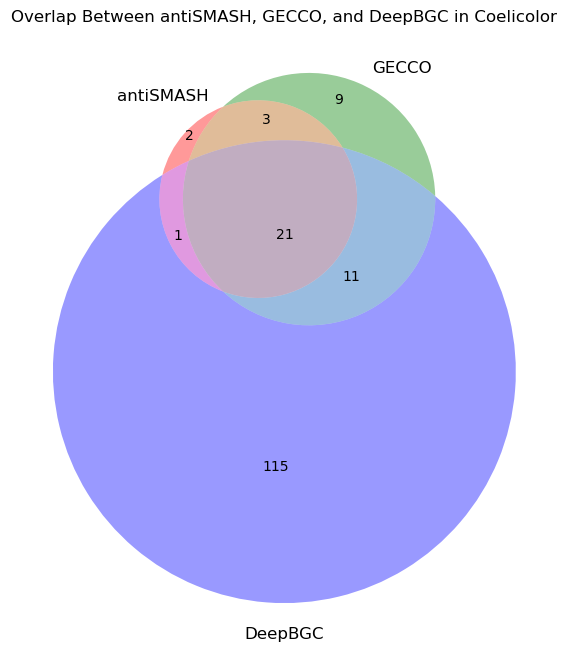

In [35]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

data = BGC_Colicolor

# Create sets for each tool
antiSMASH_set = set(data[data['antiSMASH'] == 1].index)
GECCO_set = set(data[data['GECCO'] == 1].index)
DeepBGC_set = set(data[data['DeepBGC'] == 1].index)

# Generate the Venn diagram
plt.figure(figsize=(8, 8))
venn = venn3(
    [antiSMASH_set, GECCO_set, DeepBGC_set],
    ('antiSMASH', 'GECCO', 'DeepBGC')
)

# Customize the plot appearance
plt.title("Overlap Between antiSMASH, GECCO, and DeepBGC in Coelicolor")
plt.show()


In [36]:
# Create sets for each tool
unique_gecco = set(data[(data['antiSMASH'] == 0) & (data['GECCO'] == 1) & (data['DeepBGC'] == 0)].index)
unique_antismash = set(data[(data['antiSMASH'] == 1) & (data['GECCO'] == 0) & (data['DeepBGC'] == 0)].index)
unique_deepbgc = set(data[(data['antiSMASH'] == 0) & (data['GECCO'] == 0) & (data['DeepBGC'] == 1)].index)
intersection_gecco_antismash = set(data[(data['antiSMASH'] == 1) & (data['GECCO'] == 1) & (data['DeepBGC'] == 0)].index)
intersection_gecco_deepbgc = set(data[(data['antiSMASH'] == 0) & (data['GECCO'] == 1) & (data['DeepBGC'] == 1)].index)
intersection_antismash_deepbgc = set(data[(data['antiSMASH'] == 1) & (data['GECCO'] == 0) & (data['DeepBGC'] == 1)].index)
intersection_all = set(data[(data['antiSMASH'] == 1) & (data['GECCO'] == 1) & (data['DeepBGC'] == 1)].index)

# Print results
print(f"Unique regions in GECCO: {len(unique_gecco)}")
print(f"Unique regions in AntiSMASH: {len(unique_antismash)}")
print(f"Unique regions in DeepBGC: {len(unique_deepbgc)}")
print(f"Intersection between GECCO and AntiSMASH: {len(intersection_gecco_antismash)}")
print(f"Intersection between GECCO and DeepBGC: {len(intersection_gecco_deepbgc)}")
print(f"Intersection between AntiSMASH and DeepBGC: {len(intersection_antismash_deepbgc)}")
print(f"Intersection across all three tools: {len(intersection_all)}")

Unique regions in GECCO: 9
Unique regions in AntiSMASH: 2
Unique regions in DeepBGC: 115
Intersection between GECCO and AntiSMASH: 3
Intersection between GECCO and DeepBGC: 11
Intersection between AntiSMASH and DeepBGC: 1
Intersection across all three tools: 21


In [37]:
BGC_ameniacus = pd.read_csv("BGC_predictions/BGC_predictions_summary_ameniacus.tsv", sep="\t")
BGC_ameniacus

,Sequence ID,Start,End,BGC Type,antiSMASH,GECCO,DeepBGC
0,3,0,11233,hydrogen-cyanide,1,0,0
1,2,8062,21281,hydrogen-cyanide,1,0,0
2,2,207840,217384,Terpene,0,0,1
3,2,218090,219786,Unknown,0,0,1
4,2,221467,222652,Saccharide,0,0,1
...,...,...,...,...,...,...,...
113,2,7431025,7431814,Unknown,0,0,1
114,2,7436133,7516835,"RiPP,NRP,NRPS",1,1,1
115,2,7549999,7577366,Terpene,1,1,1
116,2,7820641,7943169,"Polyketide,T1PKS,oligosaccharide,PKS-like",1,1,1


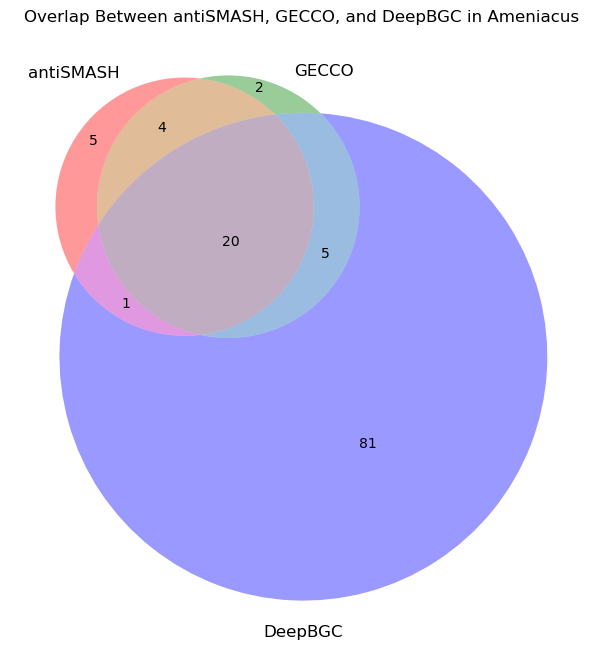

In [38]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

data = BGC_ameniacus

# Create sets for each tool
antiSMASH_set = set(data[data['antiSMASH'] == 1].index)
GECCO_set = set(data[data['GECCO'] == 1].index)
DeepBGC_set = set(data[data['DeepBGC'] == 1].index)

# Generate the Venn diagram
plt.figure(figsize=(8, 8))
venn = venn3(
    [antiSMASH_set, GECCO_set, DeepBGC_set],
    ('antiSMASH', 'GECCO', 'DeepBGC')
)

# Customize the plot appearance
plt.title("Overlap Between antiSMASH, GECCO, and DeepBGC in Ameniacus")
plt.show()


In [39]:
# Create sets for each tool
unique_gecco = set(data[(data['antiSMASH'] == 0) & (data['GECCO'] == 1) & (data['DeepBGC'] == 0)].index)
unique_antismash = set(data[(data['antiSMASH'] == 1) & (data['GECCO'] == 0) & (data['DeepBGC'] == 0)].index)
unique_deepbgc = set(data[(data['antiSMASH'] == 0) & (data['GECCO'] == 0) & (data['DeepBGC'] == 1)].index)
intersection_gecco_antismash = set(data[(data['antiSMASH'] == 1) & (data['GECCO'] == 1) & (data['DeepBGC'] == 0)].index)
intersection_gecco_deepbgc = set(data[(data['antiSMASH'] == 0) & (data['GECCO'] == 1) & (data['DeepBGC'] == 1)].index)
intersection_antismash_deepbgc = set(data[(data['antiSMASH'] == 1) & (data['GECCO'] == 0) & (data['DeepBGC'] == 1)].index)
intersection_all = set(data[(data['antiSMASH'] == 1) & (data['GECCO'] == 1) & (data['DeepBGC'] == 1)].index)

# Print results
print(f"Unique regions in GECCO: {len(unique_gecco)}")
print(f"Unique regions in AntiSMASH: {len(unique_antismash)}")
print(f"Unique regions in DeepBGC: {len(unique_deepbgc)}")
print(f"Intersection between GECCO and AntiSMASH: {len(intersection_gecco_antismash)}")
print(f"Intersection between GECCO and DeepBGC: {len(intersection_gecco_deepbgc)}")
print(f"Intersection between AntiSMASH and DeepBGC: {len(intersection_antismash_deepbgc)}")
print(f"Intersection across all three tools: {len(intersection_all)}")

Unique regions in GECCO: 2
Unique regions in AntiSMASH: 5
Unique regions in DeepBGC: 81
Intersection between GECCO and AntiSMASH: 4
Intersection between GECCO and DeepBGC: 5
Intersection between AntiSMASH and DeepBGC: 1
Intersection across all three tools: 20


In [40]:
BGC_avidinii = pd.read_csv("BGC_predictions/BGC_predictions_summary_avidinii.tsv", sep="\t")
BGC_avidinii

,Sequence ID,Start,End,BGC Type,antiSMASH,GECCO,DeepBGC
0,1,2,74062,"butyrolactone,NRPS-like,NRPS,NRP",1,1,1
1,1,79179,81163,Other,0,0,1
2,1,93055,93805,Unknown,0,0,1
3,1,128035,215823,"Polyketide,Other,NAPAA,CDPS",1,1,1
4,1,255094,312881,"T3PKS,Polyketide",1,1,1
...,...,...,...,...,...,...,...
101,1,8126512,8134432,RiPP,0,0,1
102,1,8136715,8139188,Unknown,0,0,1
103,1,8140207,8144490,Unknown,0,0,1
104,1,8145157,8151715,Unknown,0,0,1


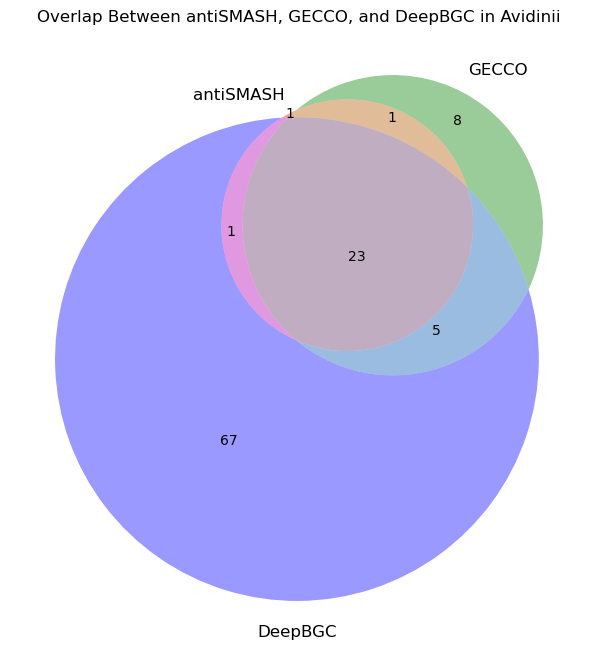

In [41]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

data = BGC_avidinii

# Create sets for each tool
antiSMASH_set = set(data[data['antiSMASH'] == 1].index)
GECCO_set = set(data[data['GECCO'] == 1].index)
DeepBGC_set = set(data[data['DeepBGC'] == 1].index)

# Generate the Venn diagram
plt.figure(figsize=(8, 8))
venn = venn3(
    [antiSMASH_set, GECCO_set, DeepBGC_set],
    ('antiSMASH', 'GECCO', 'DeepBGC')
)

# Customize the plot appearance
plt.title("Overlap Between antiSMASH, GECCO, and DeepBGC in Avidinii")
plt.show()


In [42]:
# Create sets for each tool
unique_gecco = set(data[(data['antiSMASH'] == 0) & (data['GECCO'] == 1) & (data['DeepBGC'] == 0)].index)
unique_antismash = set(data[(data['antiSMASH'] == 1) & (data['GECCO'] == 0) & (data['DeepBGC'] == 0)].index)
unique_deepbgc = set(data[(data['antiSMASH'] == 0) & (data['GECCO'] == 0) & (data['DeepBGC'] == 1)].index)
intersection_gecco_antismash = set(data[(data['antiSMASH'] == 1) & (data['GECCO'] == 1) & (data['DeepBGC'] == 0)].index)
intersection_gecco_deepbgc = set(data[(data['antiSMASH'] == 0) & (data['GECCO'] == 1) & (data['DeepBGC'] == 1)].index)
intersection_antismash_deepbgc = set(data[(data['antiSMASH'] == 1) & (data['GECCO'] == 0) & (data['DeepBGC'] == 1)].index)
intersection_all = set(data[(data['antiSMASH'] == 1) & (data['GECCO'] == 1) & (data['DeepBGC'] == 1)].index)

# Print results
print(f"Unique regions in GECCO: {len(unique_gecco)}")
print(f"Unique regions in AntiSMASH: {len(unique_antismash)}")
print(f"Unique regions in DeepBGC: {len(unique_deepbgc)}")
print(f"Intersection between GECCO and AntiSMASH: {len(intersection_gecco_antismash)}")
print(f"Intersection between GECCO and DeepBGC: {len(intersection_gecco_deepbgc)}")
print(f"Intersection between AntiSMASH and DeepBGC: {len(intersection_antismash_deepbgc)}")
print(f"Intersection across all three tools: {len(intersection_all)}")

Unique regions in GECCO: 8
Unique regions in AntiSMASH: 1
Unique regions in DeepBGC: 67
Intersection between GECCO and AntiSMASH: 1
Intersection between GECCO and DeepBGC: 5
Intersection between AntiSMASH and DeepBGC: 1
Intersection across all three tools: 23


# Task 2 - GeneBank Annotation

### Avidinii GeneBank Annotation

You will first **load the GenBank** file using $BioPython$ and then add custom annotations.

In [43]:
from Bio import SeqIO

# Load the input GenBank file
input_file = "/Users/Erfan/Downloads/The_genomes/Streptomyces_avidinii_DSM40526.gbk"
record = SeqIO.read(input_file, "genbank")


Here are the predicted BGCs:

In [44]:
from Bio.SeqFeature import SeqFeature, FeatureLocation

bgc_predictions = regions_of_interest_antiSMASH_avidinii
tool = "antismash"

# Add BGC features
for bgc in bgc_predictions:
    feature = SeqFeature(FeatureLocation(bgc["start"], bgc["end"]), type="BGC")
    bgc_type = bgc["bgc_type"].replace(";", ",")
    # feature.qualifiers["product"] = f'"{bgc_type}"'
    # feature.qualifiers["tool"] = f'"{tool}"'
    feature.qualifiers["product"] = bgc_type
    feature.qualifiers["tool"] = tool
    record.features.append(feature)

bgc_predictions = regions_of_interest_GECCO_avidinii
tool = "gecco"

# Add BGC features
for bgc in bgc_predictions:
    feature = SeqFeature(FeatureLocation(bgc["start"], bgc["end"]), type="BGC")
    bgc_type = bgc["bgc_type"].replace(";", ",")
    # feature.qualifiers["product"] = f'"{bgc_type}"'
    # feature.qualifiers["tool"] = f'"{tool}"'
    feature.qualifiers["product"] = bgc_type
    feature.qualifiers["tool"] = tool
    record.features.append(feature)


bgc_predictions = deepbgc_output_avidinii
tool = "deepbgc"

# Add BGC features
for index, bgc in bgc_predictions.iterrows():
    feature = SeqFeature(FeatureLocation(bgc["start"], bgc["end"]), type="BGC")
    bgc_type = bgc["bgc_type"]
    if isinstance(bgc_type, float) and math.isnan(bgc_type):
        bgc_type = "Unknown"
    bgc_type = bgc_type.replace(";", ",")
    # feature.qualifiers["product"] = f'"{bgc_type}"'
    # feature.qualifiers["tool"] = f'"{tool}"'
    feature.qualifiers["product"] = bgc_type
    feature.qualifiers["tool"] = tool
    record.features.append(feature)

In [45]:
# Define the output file path
output_file = "output_gbk/Streptomyces_avidinii_modified.gbk"

# Save the modified record
SeqIO.write(record, output_file, "genbank")

print(f"Modified record saved to {output_file}")

/Users/Erfan/.local/lib/python3.11/site-packages/Bio/SeqIO/InsdcIO.py:404: BiopythonWarning: Feature qualifier key 'candidate_cluster_number' is longer than maximum length specified by standard (20 characters).
  warnings.warn(
/Users/Erfan/.local/lib/python3.11/site-packages/Bio/SeqIO/InsdcIO.py:404: BiopythonWarning: Feature qualifier key 'candidate_cluster_numbers' is longer than maximum length specified by standard (20 characters).
  warnings.warn(
/Users/Erfan/.local/lib/python3.11/site-packages/Bio/SeqIO/InsdcIO.py:404: BiopythonWarning: Feature qualifier key 't2pks_product_classes' is longer than maximum length specified by standard (20 characters).
  warnings.warn(


Modified record saved to output_gbk/Streptomyces_avidinii_modified.gbk


### Ameniacus GeneBank Annotation

You will first **load the GenBank** file using $BioPython$ and then add custom annotations.

In [46]:
from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation

input_file = "/Users/Erfan/Downloads/The_genomes/Streptomyces_ameniacus.gbk"
records = list(SeqIO.parse(input_file, "genbank"))

# records = records[:1]
for record in records:
    print("Record id:", record.id)

    bgc_predictions = regions_of_interest_antiSMASH_ameniacus
    tool = "antismash"

    # Add BGC features
    for bgc in bgc_predictions:
        # Only add the feature if the BGC's "sequence_id" matches the record id
        if bgc["sequence_id"] == record.id:
            feature = SeqFeature(FeatureLocation(bgc["start"], bgc["end"]), type="BGC")
            bgc_type = bgc["bgc_type"].replace(";", ",")
            # feature.qualifiers["product"] = f'"{bgc_type}"'
            # feature.qualifiers["tool"] = f'"{tool}"'
            feature.qualifiers["product"] = bgc_type
            feature.qualifiers["tool"] = tool
            # feature.qualifiers["sequence_id"] = record.id
            record.features.append(feature)

    bgc_predictions = regions_of_interest_GECCO_ameniacus
    tool = "gecco"

    # Add BGC features
    for bgc in bgc_predictions:
        if bgc["sequence_id"] == record.id:
            feature = SeqFeature(FeatureLocation(bgc["start"], bgc["end"]), type="BGC")
            bgc_type = bgc["bgc_type"].replace(";", ",")
            # feature.qualifiers["product"] = f'"{bgc_type}"'
            # feature.qualifiers["tool"] = f'"{tool}"'
            feature.qualifiers["product"] = bgc_type
            feature.qualifiers["tool"] = tool
            # feature.qualifiers["sequence_id"] = record.id
            record.features.append(feature)


    bgc_predictions = deepbgc_output_ameniacus
    tool = "deepbgc"

    # Add BGC features
    for index, bgc in bgc_predictions.iterrows():
        if bgc["sequence_id"] == record.id:
            feature = SeqFeature(FeatureLocation(bgc["start"], bgc["end"]), type="BGC")
            bgc_type = bgc["bgc_type"]
            if isinstance(bgc_type, float) and math.isnan(bgc_type):
                bgc_type = "Unknown"
            bgc_type = bgc_type.replace(";", ",")
            # feature.qualifiers["product"] = f'"{bgc_type}"'
            # feature.qualifiers["tool"] = f'"{tool}"'
            feature.qualifiers["product"] = bgc_type
            feature.qualifiers["tool"] = tool
            # feature.qualifiers["sequence_id"] = record.id
            record.features.append(feature)


Record id: 1
Record id: 2
Record id: 3


In [47]:
# Define the output file path
output_file = "output_gbk/Streptomyces_ameniacus_modified.gbk"

# Save the modified record
SeqIO.write(records, output_file, "genbank")

print(f"Modified record saved to {output_file}")

/Users/Erfan/.local/lib/python3.11/site-packages/Bio/SeqIO/InsdcIO.py:404: BiopythonWarning: Feature qualifier key 't2pks_malonyl_elongations' is longer than maximum length specified by standard (20 characters).
  warnings.warn(
/Users/Erfan/.local/lib/python3.11/site-packages/Bio/SeqIO/InsdcIO.py:404: BiopythonWarning: Feature qualifier key 't2pks_molecular_weights' is longer than maximum length specified by standard (20 characters).
  warnings.warn(


Modified record saved to output_gbk/Streptomyces_ameniacus_modified.gbk


### S.coelicolor GeneBank Annotation

You will first **load the GenBank** file using $BioPython$ and then add custom annotations.

In [48]:
from Bio import SeqIO

# Load the input GenBank file
input_file = "/Users/Erfan/Downloads/The_genomes/S.coelicolor_A3.gbk"
record = SeqIO.read(input_file, "genbank")


Here are the predicted BGCs:

In [49]:
from Bio.SeqFeature import SeqFeature, FeatureLocation

bgc_predictions = regions_of_interest_antiSMASH_coelicolor
tool = "antismash"

# Add BGC features
for bgc in bgc_predictions:
    feature = SeqFeature(FeatureLocation(bgc["start"], bgc["end"]), type="BGC")
    bgc_type = bgc["bgc_type"].replace(";", ",")
    # feature.qualifiers["product"] = f'"{bgc_type}"'
    # feature.qualifiers["tool"] = f'"{tool}"'
    feature.qualifiers["product"] = bgc_type
    feature.qualifiers["tool"] = tool
    record.features.append(feature)

bgc_predictions = regions_of_interest_GECCO_coelicolor
tool = "gecco"

# Add BGC features
for bgc in bgc_predictions:
    feature = SeqFeature(FeatureLocation(bgc["start"], bgc["end"]), type="BGC")
    bgc_type = bgc["bgc_type"].replace(";", ",")
    # feature.qualifiers["product"] = f'"{bgc_type}"'
    # feature.qualifiers["tool"] = f'"{tool}"'
    feature.qualifiers["product"] = bgc_type
    feature.qualifiers["tool"] = tool
    record.features.append(feature)


bgc_predictions = deepbgc_output_coelicolor_A3
tool = "deepbgc"

# Add BGC features
for index, bgc in bgc_predictions.iterrows():
    feature = SeqFeature(FeatureLocation(bgc["start"], bgc["end"]), type="BGC")
    bgc_type = bgc["bgc_type"]
    if isinstance(bgc_type, float) and math.isnan(bgc_type):
        bgc_type = "Unknown"
    bgc_type = bgc_type.replace(";", ",")
    # feature.qualifiers["product"] = f'"{bgc_type}"'
    # feature.qualifiers["tool"] = f'"{tool}"'
    feature.qualifiers["product"] = bgc_type
    feature.qualifiers["tool"] = tool
    record.features.append(feature)

In [50]:
# Define the output file path
output_file = "output_gbk/S.coelicolor_A3_modified.gbk"

# Save the modified record
SeqIO.write(record, output_file, "genbank")

print(f"Modified record saved to {output_file}")

Modified record saved to output_gbk/S.coelicolor_A3_modified.gbk
